# Predict the price of a used car

In [295]:
import pandas as pd

In [296]:
# read csv data
df = pd.read_csv("Car details.csv")

In [297]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [299]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [300]:
df.drop(df[df['torque'].isnull()].index, axis=0, inplace=True)

In [301]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [302]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [303]:
df['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [304]:
df['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [305]:
df['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [306]:
df['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

#### Encoding the categorical column (fuel,seller_type,transmission,owner)

In [307]:
map_dict_fuel = {"Diesel":3, "Petrol":2, "CNG":1, "LPG":1}
df['fuel']=df['fuel'].map(map_dict_fuel)

In [308]:
map_dict_seller = {"Individual":1, "Dealer":2, "Trustmark Dealer":3}
df['seller_type']=df['seller_type'].map(map_dict_seller)

In [309]:
map_dict_trans = {"Manual":1, "Automatic":2}
df['transmission']=df['transmission'].map(map_dict_trans)

In [310]:
map_dict_owner = {"First Owner":4, "Test Drive Car":4,"Second Owner":3, "Third Owner":2, "Fourth & Above Owner":1}
df['owner']=df['owner'].map(map_dict_owner)

 seperating numerical values

In [311]:
df['mileage'] = df['mileage'].str.split(" ").str[0].astype('float')

In [312]:
df['engine'] = df['engine'].str.split(" ").str[0].astype('float')

In [313]:
df['max_power'] = df['max_power'].str.split(" ").str[0].astype('float')

In [314]:
df['seats'] = df['seats'].astype('int')

In [315]:
# drop torque beacause unit is confusing
df.drop('torque',axis = 1 ,inplace=True)

In [316]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,3,1,1,4,23.40,1248.0,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,3,1,1,3,21.14,1498.0,103.52,5
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,2,17.70,1497.0,78.00,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,3,1,1,4,23.00,1396.0,90.00,5
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,4,16.10,1298.0,88.20,5


Encoading the name column

In [317]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])

In [318]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1249,2014,450000,145500,3,1,1,4,23.40,1248.0,74.00,5
1,1546,2014,370000,120000,3,1,1,3,21.14,1498.0,103.52,5
2,375,2006,158000,140000,2,1,1,2,17.70,1497.0,78.00,5
3,743,2010,225000,127000,3,1,1,4,23.00,1396.0,90.00,5
4,1290,2007,130000,120000,2,1,1,4,16.10,1298.0,88.20,5


### Split the data

In [319]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [320]:
X.shape, y.shape

((7906, 11), (7906,))

In [321]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [322]:
x_train.shape, x_eval.shape, y_train.shape, y_eval.shape

((6324, 11), (1582, 11), (6324,), (1582,))

### Linear Regresssion

In [323]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [324]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

Metrics for linear regression

In [325]:
mean_absolute_error(y_test, y_pred_lr)

270961.38918697066

In [326]:
mean_squared_error(y_test, y_pred_lr)

219655031689.90155

In [327]:
np.sqrt(mean_squared_error(y_test, y_pred_lr))

468673.69425849104

In [328]:
r2_score(y_test, y_pred_lr)

0.684078254637906

In [329]:
model.coef_

array([-3.91993438e+01,  3.13698127e+04, -1.05494708e+00,  4.69468318e+04,
        8.33641489e+04,  4.65096419e+05,  2.20776820e+04,  1.49263293e+04,
        9.55646063e+01,  1.30001578e+04, -4.13220858e+04])

In [330]:
x_train.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

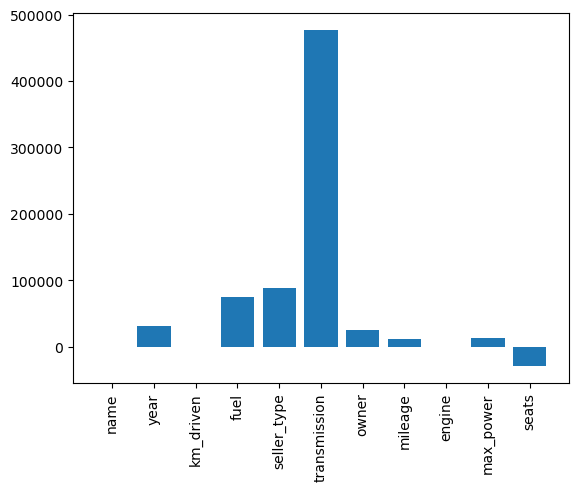

In [331]:
import matplotlib.pyplot as plt
plt.bar(x = x_train.columns, height = lr.coef_)
plt.xticks(rotation = 90)
plt.show()

### lasso

In [332]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

Metrics for linear regression

In [333]:
mean_absolute_error(y_test, y_pred_lasso)

270961.3620187199

In [334]:
mean_squared_error(y_test, y_pred_lasso)

219655024261.08884

In [335]:
np.sqrt(mean_squared_error(y_test, y_pred_lasso))

468673.68633313396

In [336]:
r2_score(y_test, y_pred_lasso)

0.6840782653224937

In [337]:
ls.coef_

array([ -17.85623074,    0.        ,    0.22594446,    0.        ,
          0.        ,    0.        ,   -0.        ,    0.        ,
         -0.        , -107.83329876,    0.        ])

In [338]:
x_train.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

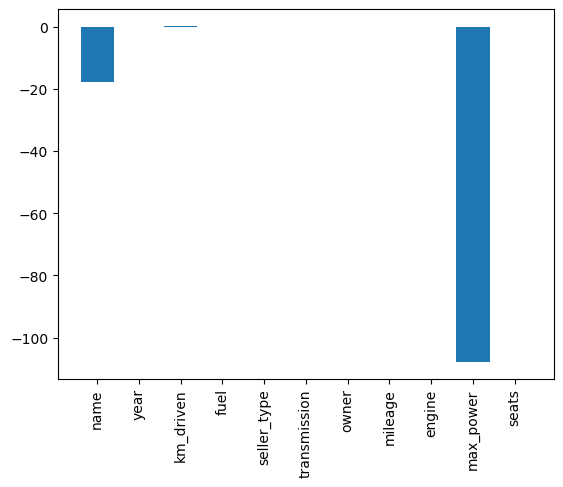

In [339]:
plt.bar(x = x_train.columns, height = ls.coef_)
plt.xticks(rotation = 90)
plt.show()

### Ridge

In [340]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

Metrics for linear regression

In [341]:
mean_absolute_error(y_test, y_pred_ridge)

270977.0547485853

In [342]:
mean_squared_error(y_test, y_pred_ridge)

219655099592.19083

In [343]:
np.sqrt(mean_squared_error(y_test, y_pred_ridge))

468673.76669938635

In [344]:
r2_score(y_test, y_pred_ridge)

0.6840781569765432

In [345]:
rg.coef_

array([-1.94309623e+01,  5.41877124e+02,  2.26492679e-01,  4.00163299e+02,
        5.01746830e+01,  8.93987594e+01, -1.54106207e+02,  1.12892456e+03,
        1.29954007e+01, -2.79421960e+02,  2.27355985e+02])

In [346]:
x_train.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

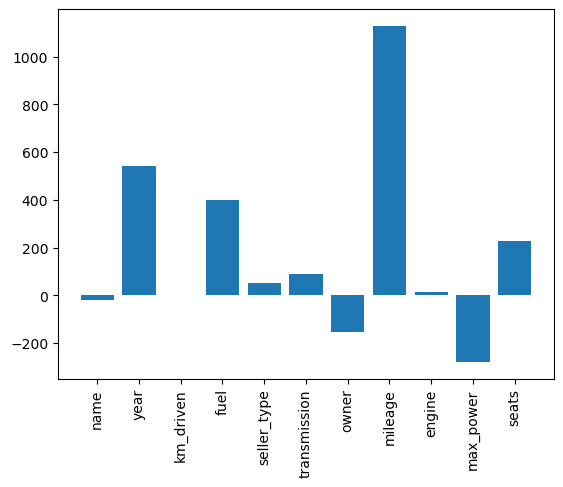

In [347]:
plt.bar(x = x_train.columns, height = rg.coef_)
plt.xticks(rotation = 90)
plt.show()

## Decision Tree Regression

In [350]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(min_samples_leaf=3)
model = DTR.fit(X_train,y_train)
y_predict=DTR.predict(X_test)

Metrics for linear regression

In [351]:
mean_absolute_error(y_test, y_predict)

73974.96593157618

In [352]:
mean_squared_error(y_test, y_predict)

20599113100.043076

In [353]:
np.sqrt(mean_squared_error(y_test, y_predict))

143523.9112484156

In [354]:
r2_score(y_test,y_predict)

0.9703730539955758

## Random Forest Regression

In [356]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=3)
RForest.fit(X_train,y_train)
y_predict=RForest.predict(X_test)

In [357]:
mean_absolute_error(y_test, y_predict)

62489.730540328455

In [358]:
mean_squared_error(y_test, y_predict)

13733220928.176533

In [359]:
np.sqrt(mean_squared_error(y_test, y_predict))

117188.82595271843

In [360]:
r2_score(y_test,y_predict)

0.9802480139348785